# Figure 1-3 Ape AGW

## 1. Summary statistics from the dataset

## 2. Histogram of the distribution of different types of mutatinos

## 3. Scatterplot of the variants

## 4. Logo plot of the mutations that are enhancing in Cis and Trans

In [60]:
import pandas as pd
from sciutil import SciUtil
import numpy as np
import matplotlib.pyplot as plt
u = SciUtil()
data_dir = '/Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/'
figure_dir = '/Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Figures/'
df = pd.read_csv(f'{data_dir}parlq2_Dataset_combined.csv')

## 1. Summary statistics from the dataset

We want to know: 

1. Alignment across the dataset
2. Number of wells not meeting our threshold (< 6)
3. Number of wells not meeting ParSEQs threshold
4. Number of parents, mutation counts, deltions resulting in a frameshift mutation, truncated sequneces


In [79]:
df['# Mutations'] = [len(x.split('_')) if x != '#PARENT#' else 0 for x in df['Mutations'].values]
df['cis - trans'] = df['cis'] - df['trans']
df['trans - cis'] = df['trans'] - df['cis']

features = ['cis', 'trans', 'Average mutation frequency', '# Mutations', 'Alignment Count']
# Normalise each of these columns 
# Let's first drop parenst # df[df['EPS'].notna()]
for f in features:
    vals = df[f].values
    df[f'{f}_norm'] = (vals - np.nanmean(vals))/(np.nanstd(vals))
    df[f'{f}_log2'] = np.log2(vals + 1)

In [62]:
df[['Alignment Count', 'Average mutation frequency', '# Mutations']].describe()

,Alignment Count,Average mutation frequency,# Mutations
count,960.000000,524.000000,960.000000
mean,43.993750,0.917419,0.976042
std,54.867667,0.102354,0.917021
min,0.000000,0.400000,0.000000
25%,7.000000,0.908902,0.000000
50%,26.000000,0.945762,1.000000
75%,62.000000,0.970650,1.000000
max,428.000000,1.000000,5.000000


In [63]:
df['# Mutations'].value_counts()

# Mutations
1    487
0    294
2    114
3     40
4     23
5      2
Name: count, dtype: int64

In [80]:
# Now classify each of them with the specific labels
df['trunc_label'] = ['Truncated' if '*' in v else 'OK' for v in df['aa_variant'].values]
df['Type'] = [m if '*' not in str(v) else '#TRUNCATED#' for m, v in df[['Mutations', 'aa_variant']].values]

na_df = df[df['Type'] == '#N.A.#']
trunc_df = df[df['Type'] == '#TRUNCATED#']
deletion_df = df[df['Mutations'] == '-'] # Delection
parent_df = df[df['Type'] == '#PARENT#']
variant_df = df[~df['Type'].isin(['#PARENT#', '#N.A.#', '#TRUNCATED#', '-'])]
u.dp(['Number of frame shifts: ', len(na_df), 
      '\nNumber of truncations: ', len(trunc_df), 
      '\nNumber of parents: ',  len(parent_df), 
      '\nNumber of variants:',  len(variant_df)
     ])


--------------------------------------------------------------------------------
Number of frame shifts: 	207	
Number of truncations: 	37	
Number of parents: 	294	
Number of variants:	368	
--------------------------------------------------------------------------------


In [81]:
df['Type'] = [v if v != '-' else '#DELETION#' for v in df['Type'].values]
df['Type'] = [v if v[0] == '#' else '#VARIANT#' for v in df['Type'].values]
df['Type'] = [v if v != '#N.A.#' else 'Reads < 5' for v in df['Type'].values]
df['Type'] = [v if v != '#DELETION#' else 'Deletion' for v in df['Type'].values]
df['Type'] = [v if v != '#VARIANT#' else 'Variant' for v in df['Type'].values]
df['Type'] = [v if v != '#PARENT#' else 'Parent' for v in df['Type'].values]
df['Type'] = [v if v != '#TRUNCATED#' else 'Truncated' for v in df['Type'].values]

df['Type'].value_counts()

Type
Variant      368
Parent       294
Reads < 5    207
Deletion      54
Truncated     37
Name: count, dtype: int64

In [66]:
cols = ['Alignment Count', 'Average mutation frequency', '# Mutations', 
       'P adj. value', 'cis', 'trans', 'cis_norm', 'trans_norm']
na_df[cols].describe()

,Alignment Count,Average mutation frequency,# Mutations,P adj. value,cis,trans,cis_norm,trans_norm
count,207.000000,0.0,207.0,0.0,2.070000e+02,2.070000e+02,207.000000,207.000000
mean,0.942029,NaN,1.0,NaN,4.688205e+05,3.879827e+05,-0.166579,-0.188988
std,1.283397,NaN,0.0,NaN,3.734867e+05,2.775516e+05,0.770207,0.767934
min,0.000000,NaN,1.0,NaN,0.000000e+00,0.000000e+00,-1.133384,-1.262465
25%,0.000000,NaN,1.0,NaN,2.754728e+05,2.197489e+05,-0.565302,-0.654460
50%,0.000000,NaN,1.0,NaN,4.894889e+05,4.189324e+05,-0.123957,-0.103356
75%,2.000000,NaN,1.0,NaN,5.932835e+05,4.850224e+05,0.090089,0.079503
max,4.000000,NaN,1.0,NaN,2.426330e+06,1.813075e+06,3.870211,3.753982


In [67]:
trunc_df[cols].describe()

,Alignment Count,Average mutation frequency,# Mutations,P adj. value,cis,trans,cis_norm,trans_norm
count,37.000000,37.000000,37.000000,3.700000e+01,3.700000e+01,37.000000,37.000000,37.000000
mean,64.297297,0.932039,1.945946,7.404799e-07,1.347184e+05,113100.999316,-0.855567,-0.949536
std,77.286216,0.053295,0.880213,4.309910e-06,2.224366e+05,148729.425016,0.458710,0.411507
min,6.000000,0.809524,1.000000,0.000000e+00,0.000000e+00,0.000000,-1.133384,-1.262465
25%,21.000000,0.911765,1.000000,7.425101e-175,3.026028e+04,23513.558200,-1.070981,-1.197408
50%,35.000000,0.943089,2.000000,2.942570e-91,6.382506e+04,58656.296100,-1.001764,-1.100174
75%,99.000000,0.959677,2.000000,1.532496e-47,1.260810e+05,145793.736500,-0.873379,-0.859081
max,428.000000,1.000000,4.000000,2.622249e-05,1.174134e+06,705836.734500,1.287923,0.690456


In [68]:
deletion_df[cols].describe()

,Alignment Count,Average mutation frequency,# Mutations,P adj. value,cis,trans,cis_norm,trans_norm
count,54.000000,54.000000,54.0,5.400000e+01,5.400000e+01,54.000000,54.000000,54.000000
mean,59.203704,0.909654,1.0,7.336512e-07,1.569935e+05,138445.915383,-0.809631,-0.879411
std,50.238067,0.067156,0.0,5.391213e-06,2.201174e+05,190237.392022,0.453928,0.526352
min,8.000000,0.666667,1.0,0.000000e+00,0.000000e+00,0.000000,-1.133384,-1.262465
25%,21.500000,0.892602,1.0,3.331626e-247,3.496019e+04,27236.848125,-1.061289,-1.187106
50%,48.000000,0.925227,1.0,2.028731e-112,6.555243e+04,55723.460250,-0.998202,-1.108289
75%,72.250000,0.952238,1.0,3.028687e-60,1.208467e+05,174363.487700,-0.884174,-0.780033
max,252.000000,1.000000,1.0,3.961716e-05,1.002593e+06,916204.844600,0.934170,1.272506


In [69]:
parent_df[cols].describe()

,Alignment Count,Average mutation frequency,# Mutations,P adj. value,cis,trans,cis_norm,trans_norm
count,294.000000,65.000000,294.0,6.500000e+01,2.940000e+02,2.940000e+02,294.000000,294.000000
mean,53.897959,0.908086,0.0,3.533515e-08,6.847342e+05,5.788792e+05,0.278680,0.339187
std,57.574968,0.126338,0.0,2.835138e-07,4.893086e+05,3.699548e+05,1.009056,1.023597
min,5.000000,0.511364,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-1.133384,-1.262465
25%,16.000000,0.900000,0.0,3.221501e-79,4.116654e+05,3.378630e+05,-0.284445,-0.327660
50%,35.500000,0.941176,0.0,2.189605e-39,5.503604e+05,4.698631e+05,0.001573,0.037560
75%,65.000000,0.982759,0.0,2.428755e-22,8.014934e+05,7.771923e+05,0.519461,0.887884
max,407.000000,1.000000,0.0,2.285910e-06,2.276523e+06,1.667838e+06,3.561278,3.352137


In [70]:
variant_df[cols].describe()

,Alignment Count,Average mutation frequency,# Mutations,P adj. value,cis,trans,cis_norm,trans_norm
count,368.000000,368.000000,368.000000,3.680000e+02,3.680000e+02,3.680000e+02,368.000000,368.000000
mean,56.024457,0.918737,1.641304,3.161050e-03,5.863963e+05,4.779150e+05,0.075886,0.059838
std,54.074396,0.105681,0.905105,5.274572e-02,5.235422e+05,3.740523e+05,1.079653,1.034934
min,6.000000,0.400000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.133384,-1.262465
25%,17.000000,0.916667,1.000000,1.355720e-182,2.656892e+05,2.155809e+05,-0.585478,-0.665992
50%,41.500000,0.949490,1.000000,3.311814e-81,4.825884e+05,4.098467e+05,-0.138187,-0.128495
75%,74.250000,0.973332,2.000000,2.668209e-33,6.815377e+05,6.317647e+05,0.272088,0.485512
max,398.000000,1.000000,5.000000,1.000000e+00,3.176372e+06,1.708653e+06,5.416954,3.465064


In [71]:
variant_df['# Mutations'].value_counts()

# Mutations
1    213
2     99
3     33
4     21
5      2
Name: count, dtype: int64

## 2. Histogram of the distribution of different types of mutatinos


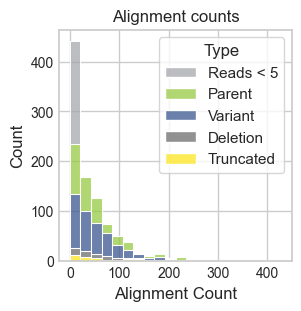

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (3, 3), 'font.family':  'sans-serif',
                'font.sans-serif': 'Arial', 'font.size': 12}, style='whitegrid')
sns.palette = ['#A6A7AC', '#97CA43', '#3A568E', '#6D6D6D', '#FDE520']
palette = ['#A6A7AC', '#97CA43', '#3A568E', '#6D6D6D', '#FDE520']
plt.rcParams['svg.fonttype'] = 'none'

def set_ax_params(ax):
    ax.tick_params(direction='out', length=2, width=1.0)
    #ax.spines['bottom'].set_linewidth(1.0)
    #ax.spines['top'].set_linewidth(0)
    #ax.spines['left'].set_linewidth(1.0)
    #ax.spines['right'].set_linewidth(0)
    ax.tick_params(labelsize=10)
    ax.tick_params(axis='x', which='major', pad=2.0)
    ax.tick_params(axis='y', which='major', pad=2.0)
    
ax = sns.histplot(data=df, x="Alignment Count", hue="Type", bins=20, palette=palette, multiple="stack")
set_ax_params(ax)
plt.title('Alignment counts')
plt.savefig(f'{figure_dir}Figure1_Bar_AlignmentCounts.svg', bbox_inches='tight')

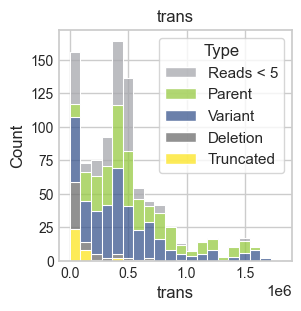

In [73]:
col = 'trans'
ax = sns.histplot(data=df, x=col, hue="Type", bins=20, palette=palette, multiple="stack")
set_ax_params(ax)
plt.title(f'{col}')
plt.savefig(f'{figure_dir}Figure1_Bar_Trans.svg', bbox_inches='tight')

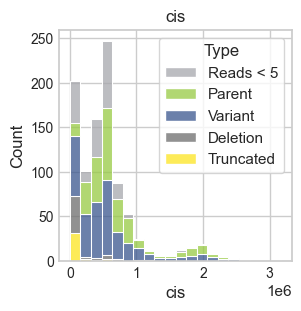

In [74]:
col = 'cis'
ax = sns.histplot(data=df, x=col, hue="Type", bins=20, palette=palette, multiple="stack")
set_ax_params(ax)
plt.title(f'{col}')
plt.savefig(f'{figure_dir}Figure1_Bar_Cis.svg', bbox_inches='tight')

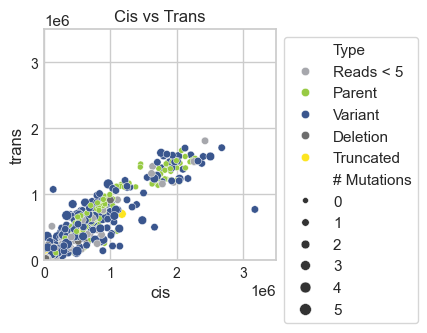

In [75]:
import seaborn as sns

ax = sns.scatterplot(df, x='cis', y='trans', hue='Type', palette=palette, size='# Mutations')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
set_ax_params(ax)
plt.xlim(0, 3.5*10**6)
plt.ylim(0, 3.5*10**6)
ax.yaxis.set_ticks([0, 1*10**6, 2*10**6, 3*10**6])

plt.title('Cis vs Trans')
plt.savefig(f'{figure_dir}Figure1_Scatter_Cis-Trans.svg', bbox_inches='tight')

## Make logo plots of all the protoglobins

The following search on uniprot provides 406 results: `(Protoglobin ApPgb) OR uniref_cluster_50:UniRef50_A0A7U4E8E6`. This was on the 11th of May 2024.

In [76]:
from Bio import AlignIO, SeqIO
import os
def make_msa(seqs, seq_ids, file_to_align='msa.fa'):
    """
    Potentialy change this so that the MSA file has the unique time stamp so that we don't get overriding issues.
    """
    with open(file_to_align, 'w+') as fout:
        for i, seq in enumerate(seqs):
            if isinstance(seq, str) and len(seq) > 0:
                fout.write(f'>{seq_ids[i]}\n{seq}\n')

    # Now make the msa
    msa_file = f'{file_to_align.replace(".fa", "_msa.fa")}'
    # Write each one as a fasta file then run the clustal and then the tree
    os.system(f'/Users/ariane/Documents/code/MinION/software/./clustal-omega-1.2.3-macosx --force -i {file_to_align} -o {msa_file} -v')
    # Reading the alignment file
    alignment = AlignIO.read(msa_file, 'fasta')
    return alignment


# Read in an alignment from uniprot and then add in the sequences of the top 10 variants 
top_cis = df.sort_values(by='cis', ascending=False)
top_cis # Add into the MSA
# Using the sequences let's now get the MSA
alignment = AlignIO.read(f"{data_dir}uniprot/uniprotkb_uniref_cluster_50_UniRef50_A0_2024_05_07_msa.fasta", "fasta")
seqs = []
seq_ids = []
for id, mutations, seq in top_cis[['id', 'Mutations', 'aa_variant']].values:
    seqs.append(seq)
    seq_ids.append(f'{id}_{mutations}')

for seq_record in SeqIO.parse(f'{data_dir}uniprot/uniprotkb_Protoglobin_ApPgb_OR_uniref_c_2024_05_11.fasta', "fasta"):
    seq_ids.append(seq_record.id)
    seqs.append(str(seq_record.seq.replace('-', '')))

alignment = make_msa(seqs, seq_ids, f'/Users/ariane/Documents/code/MinION/APE_AGW_uniprotkb_Protoglobin_ApPgb_OR_uniref_c_2024_05_11.fasta')


Using 16 threads
Read 1366 sequences (type: Protein) from /Users/ariane/Documents/code/MinION/APE_AGW_uniprotkb_Protoglobin_ApPgb_OR_uniref_c_2024_05_11.fasta
Using 108 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 1366 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress done. CPU time: 6.86u 0.06s 00:00:06.92 Elapsed: 00:00:00
mBed created 15 cluster/s (with a minimum of 1 and a soft maximum of 100 sequences each)


Distance calculation within sub-clusters done. CPU time: 4.64u 0.06s 00:00:04.69 Elapsed: 00:00:01
Guide-tree computation (mBed) done.


In [48]:
alignment = AlignIO.read(f'/Users/ariane/Documents/code/MinION/APE_AGW_uniprotkb_Protoglobin_ApPgb_OR_uniref_c_2024_05_11_msa.fasta', "fasta")


In [35]:
import logomaker
import matplotlib.pyplot as plt

record_map = {record.id:record.seq for record in alignment}
position_map = {}
epcr_muations = []
for id, mutations in df[['id', 'Mutations']].values:
    try:
        if len(str(mutations)) > 2:
            seq = record_map.get(f'{id}_{mutations.split(" ")[0]}')
            if 'PARENT' not in mutations and 'DEL' not in mutations and 'NA' not in mutations:
                for mutation in mutations.split('_'):
                    position = int(mutation[1:-1])
                    new_position = position - 1
                    # now we add to that position until we get to that in the seqeunce
                    gap_count = 0
                    position_count = 0
                    for i in range(0, len(seq)):
                        if seq[i] != '-':
                            position_count += 1
                            if position_count == position:
                                break
                        else:
                            gap_count += 1
                    epcr_muations.append(f'{id}_{mutations.split(" ")[0]}')
                    position_map[f'{id}|{mutation}'] = new_position + gap_count
    except:
        x = 0
        #print(mutations)

## Get those two outliers that we want to investigate

In [93]:
# Get the mean for the specific activity column
import numpy as np

col = 'cis - trans'
mean_parent = np.nanmean(parent_df[col].values)
std_parent = np.nanstd(parent_df[col].values)
# Get the number which are 1.5 SD above the mean parent

sig_df = df[df[col] > (mean_parent + 2*std_parent)]
sig_df = sig_df[sig_df['Type'] == 'Variant']
# Now print out the positions of the mutations so that we can look at them in the 3D viewer
print(sig_df['Mutations'])
all_mutations = []
for m in sig_df['Mutations'].values:
    all_mutations += m.split('_')
print(' '.join(f':{m[1:-1]}' for m in all_mutations))
cis_mutations = set([f':{m[1:-1]}' for m in all_mutations])
all_cis_mutations = all_mutations

7            F141S
198          I145T
290          P151L
458           F70L
559          F141L
572          K121R
578      F21C_D95G
581           C98R
597           E43V
601           F70L
607          K172E
612          E131G
613          M109L
614           V28E
615          R136G
617          M166K
618          Q104R
623      M29L_I94T
624           I67T
640           V28M
645          N107D
655          Q177R
656          K187R
657     K99R_R118C
702     R38H_F141S
708           F70L
726          F141I
756          V130A
803     D34G_K121R
847    F141L_V174M
905    P100S_P151Q
Name: Mutations, dtype: object
:141 :145 :151 :70 :141 :121 :21 :95 :98 :43 :70 :172 :131 :109 :28 :136 :166 :104 :29 :94 :67 :28 :107 :177 :187 :99 :118 :38 :141 :70 :141 :130 :34 :121 :141 :174 :100 :151


In [94]:
# Get the mean for the specific activity column
import numpy as np

col = 'trans - cis'
mean_parent = np.nanmean(parent_df[col].values)
std_parent = np.nanstd(parent_df[col].values)
# Get the number which are 1.5 SD above the mean parent

sig_df = df[df[col] > (mean_parent + 2*std_parent)]
sig_df = sig_df[sig_df['Type'] == 'Variant']
# Now print out the positions of the mutations so that we can look at them in the 3D viewer
print(sig_df['Mutations'])
all_mutations = []
for m in sig_df['Mutations'].values:
    all_mutations += m.split('_')
print(' '.join(f':{m[1:-1]}' for m in all_mutations))
trans_mutations = set([f':{m[1:-1]}' for m in all_mutations])
all_trans_mutations = all_mutations

376     V85G_I93F_W105R
494     Q48E_F89I_R118P
831          L91S_L147P
881                F89S
943    A19T_L147P_V175A
Name: Mutations, dtype: object
:85 :93 :105 :48 :89 :118 :91 :147 :89 :19 :147 :175


In [95]:
cis_mutations & trans_mutations

{':118'}

In [97]:
all_cis_mutations

['F141S',
 'I145T',
 'P151L',
 'F70L',
 'F141L',
 'K121R',
 'F21C',
 'D95G',
 'C98R',
 'E43V',
 'F70L',
 'K172E',
 'E131G',
 'M109L',
 'V28E',
 'R136G',
 'M166K',
 'Q104R',
 'M29L',
 'I94T',
 'I67T',
 'V28M',
 'N107D',
 'Q177R',
 'K187R',
 'K99R',
 'R118C',
 'R38H',
 'F141S',
 'F70L',
 'F141I',
 'V130A',
 'D34G',
 'K121R',
 'F141L',
 'V174M',
 'P100S',
 'P151Q']

In [ ]:
# Get the mean for the specific activity column
import numpy as np

col = 'trans - cis'
mean_parent = np.nanmean(parent_df[col].values)
std_parent = np.nanstd(parent_df[col].values)
# Get the number which are 1.5 SD above the mean parent

sig_df = df[df[col] > (mean_parent + 1.5*std_parent)]
sig_df = sig_df[sig_df['Type'] == 'Variant']
# Now print out the positions of the mutations so that we can look at them in the 3D viewer
print(sig_df['Mutations'])
all_mutations = []
for m in sig_df['Mutations'].values:
    all_mutations += m.split('_')
print(' '.join(f':{m[1:-1]}' for m in all_mutations))

In [49]:
# ids to investigate
highest_cis = df.sort_values(by='cis', ascending=False).head(1)
df['cis and trans'] = df['cis'].values + df['trans'].values
highest_cis_trans = df.sort_values(by='cis and trans', ascending=False).head(1)
df['trans - cis'] = df['trans'].values - df['cis'].values
df['cis - trans'] = df['cis'].values - df['trans'].values
highest_trans = df.sort_values(by='trans - cis', ascending=False).head(1)
highest_cis = df.sort_values(by='cis - trans', ascending=False).head(1)


In [86]:
highest_cis['aa_variant'].values

array(['MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALKGQVEDILDLWYGLQGSNQHLIYYLGDKSGRPIPQYLEAVRKRFGLWIIDTLCKPLDRQWLNYMYEIGLRHHRTKKGKTDGVDTVEHIPLRYMIAFIAPIGLTIKPILEKSGHPPEAVERMWAAWVKLVVLQVAIWSYPYAKTGEWLE'],
      dtype=object)

In [87]:
highest_trans['aa_variant'].values

array(['MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALKGQVEDILDLWYGLQGSNQHLIYYFGDKSGRPIPQYLEAVRKRSGLWIIDTLCKPLDRQWLNYMYEIGLRHHRTKKGKTDGVDTVEHIPLRYMIAFIAPIGLTIKPILEKSGHPPEAVERMWAAWVKLVVLQVAIWSYPYAKTGEWLE'],
      dtype=object)

In [ ]:
MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALKGQVEDILDLWYGLQGSNQHLIYYFGDKSGRPIPQYLEAVRKRSGLWIIDTLCKPLDRQWLNYMYEIGLRHHRTKKGKTDGVDTVEHIPLRYMIAFIAPIGLTIKPILEKSGHPPEAVERMWAAWVKLVVLQVAIWSYPYAKTGEWLE

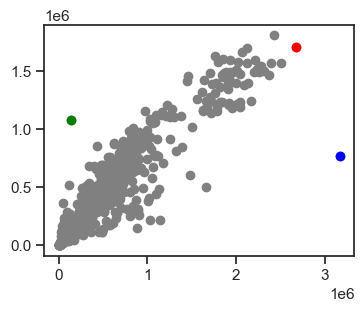

In [24]:
plt.scatter(df['cis'], df['trans'], c='grey')
plt.scatter(highest_cis_trans['cis'], highest_cis_trans['trans'], c='red')
plt.scatter(highest_trans['cis'], highest_trans['trans'], c='green')
plt.scatter(highest_cis['cis'], highest_cis['trans'], c='blue')


In [25]:
def get_mutation_naturalness(id, position_index, label, alignment, epcr_muations):
    # Now for each one where we have a mutation, let's print the position and a logo plot of that position
    plt.figure(figsize=(2, 3))  # Width, height in inches
    
    amino_acids = [record.seq[position_index] for record in alignment if record.id not in epcr_muations]
    # Do a logo and make the title the ID
    aa_types = 'ACDEFGHIKLMNPQRSTVWY'  # Standard amino acids

    counts = {aa: 0 for aa in aa_types}

    for aa in amino_acids:
        if aa in counts:
            counts[aa] += 1
    
    # Create a DataFrame for logomaker
    freq_data = pd.DataFrame([counts])
    # Check whether it is natural or not
    position_value = id.split("|")[1]
    new_aa = position_value[-1]
    position_label = ''
    if freq_data[new_aa].values[0] > 0:
        position_label = 'Natural'
    else:
        position_label = 'Not-Natural'
    freq_data = freq_data.divide(np.sum(freq_data.values))
    # Create logo from frequency data
    logo = logomaker.Logo(freq_data, ax=plt.gca())

    # Customize and show plot
    logo.style_xticks(anchor=0, spacing=1, rotation=45)
    logo.ax.set_ylabel("Frequency")
    set_ax_params(logo.ax)

    plt.title(f'{label} {position_label} {id} {int(freq_data[new_aa].values[0]*100)}%')
    plt.savefig(f'{figure_dir}Figure1_Logo_{label}.svg', bbox_inches='tight')
    plt.show()


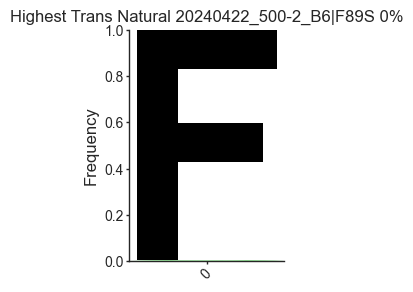

In [26]:
import numpy as np
id_of_interest = highest_trans.id.values[0]
label = 'Highest Trans'
for id, position_index in position_map.items():
    if id.split('|')[0] == id_of_interest:
        get_mutation_naturalness(id, position_index, label, alignment, epcr_muations)

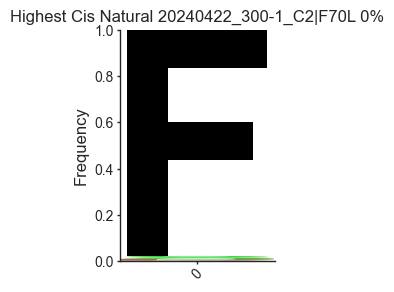

In [27]:
import numpy as np
id_of_interest = highest_cis.id.values[0]
label = 'Highest Cis'
for id, position_index in position_map.items():
    if id.split('|')[0] == id_of_interest:
        get_mutation_naturalness(id, position_index, label, alignment, epcr_muations)

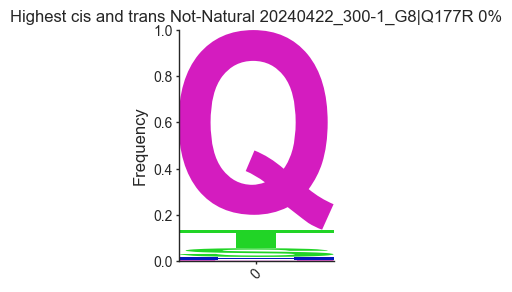

In [28]:
import numpy as np
id_of_interest = highest_cis_trans.id.values[0]
label = 'Highest cis and trans'
for id, position_index in position_map.items():
    if id.split('|')[0] == id_of_interest:
        get_mutation_naturalness(id, position_index, label, alignment, epcr_muations)

# Lastly for each we need to find the sequnences where these occur!

For both the natural and the non-natural mutations, the last step we need to do is to determine whether the mutations occur in the other sequences and what they are so we can invesitage them in uniprot. Second, if they occur in any other sequences where do they occur and what are the other mutations (i.e. are they epistatic?)

In [29]:
id_of_interest = highest_cis.id.values[0]
label = 'Highest Cis'
aa = 'L'
for id, position_index in position_map.items():
    if id.split('|')[0] == id_of_interest:    # Now for each one where we have a mutation, let's print the position and a logo plot of that position        
        rows = [[record.id, record.seq[position_index]] for record in alignment]
        position_df = pd.DataFrame(rows, columns=['id', 'AA'])
        print(position_df['AA'].value_counts())
        # also print the ids of any that have the mutation we observed
        has_aa = position_df[position_df['AA'] == aa]
        print('\n'.join(has_aa['id'].values))

AA
F    1283
-      58
S      13
L       4
D       4
Y       2
I       1
R       1
Name: count, dtype: int64
20240422_300-1_C2_F70L
20240502_500-2_G3_F70L
20240422_300-2_D1_F70L
tr|A0A522T0I9|A0A522T0I9_9GAMM


## Check out uniprot annotation

https://www.uniprot.org/uniprotkb/A0A522T0I9/entry

https://alphafold.ebi.ac.uk/entry/A0A522T0I9

In [30]:
df[df['id'] == '20240422_300-1_C2']['cis']

601    3176372.303
Name: cis, dtype: float64

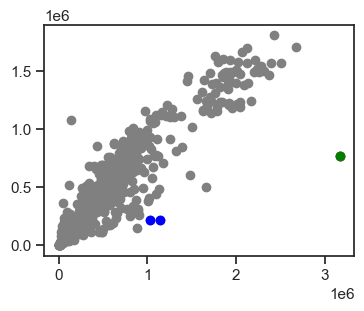

In [31]:
plt.scatter(df['cis'], df['trans'], c='grey')
plt.scatter(highest_cis['cis'], highest_cis['trans'], c='red')
plt.scatter(df[df['id'] == '20240422_300-1_C2']['cis'], df[df['id'] == '20240422_300-1_C2']['trans'], c='green')
plt.scatter(df[df['id'] == '20240502_500-2_G3']['cis'], df[df['id'] == '20240502_500-2_G3']['trans'], c='blue')
plt.scatter(df[df['id'] == '20240422_300-2_D1']['cis'], df[df['id'] == '20240422_300-2_D1']['trans'], c='blue')


In [32]:
id_of_interest = highest_trans.id.values[0]
label = 'Highest Trans'
aa = 'L'
for id, position_index in position_map.items():
    if id.split('|')[0] == id_of_interest:    # Now for each one where we have a mutation, let's print the position and a logo plot of that position        
        rows = [[record.id, record.seq[position_index]] for record in alignment]
        position_df = pd.DataFrame(rows, columns=['id', 'AA'])
        print(position_df['AA'].value_counts())
        # also print the ids of any that have the mutation we observed
        has_aa = position_df[position_df['AA'] == aa]
        print('\n'.join(has_aa['id'].values))

AA
F    1295
-      59
L       7
S       3
I       1
Y       1
Name: count, dtype: int64
20240502_500-3_A4_F89L
20240422_500-2_D10_F89L_W181L
20240502_500-3_C10_F89L
20240502_300-2_C12_F89L
20240502_500-3_G5_D72G_F89L
tr|A0A7C2TA05|A0A7C2TA05_9CREN
tr|A0A7J4ADG0|A0A7J4ADG0_9CREN


Text(0.5, 1.0, 'Epistatic relations for highest trans')

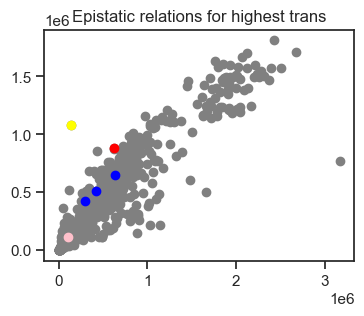

In [33]:
plt.scatter(df['cis'], df['trans'], c='grey')
plt.scatter(highest_trans['cis'], highest_trans['trans'], c='yellow')
plt.scatter(df[df['id'] == '20240502_500-3_A4']['cis'], df[df['id'] == '20240502_500-3_A4']['trans'], c='blue')
plt.scatter(df[df['id'] == '20240422_500-2_D10']['cis'], df[df['id'] == '20240422_500-2_D10']['trans'], c='red')
plt.scatter(df[df['id'] == '20240502_500-3_C10']['cis'], df[df['id'] == '20240502_500-3_C10']['trans'], c='blue')
plt.scatter(df[df['id'] == '20240502_300-2_C12']['cis'], df[df['id'] == '20240502_300-2_C12']['trans'], c='blue')
plt.scatter(df[df['id'] == '20240502_500-3_G5']['cis'], df[df['id'] == '20240502_500-3_G5']['trans'], c='pink')
plt.title('Epistatic relations for highest trans')

In [34]:
id_of_interest = highest_cis_trans.id.values[0]
label = 'Highest Cis Trans'
aa = 'R'
for id, position_index in position_map.items():
    if id.split('|')[0] == id_of_interest:    # Now for each one where we have a mutation, let's print the position and a logo plot of that position        
        rows = [[record.id, record.seq[position_index]] for record in alignment]
        position_df = pd.DataFrame(rows, columns=['id', 'AA'])
        print(position_df['AA'].value_counts())
        # also print the ids of any that have the mutation we observed
        has_aa = position_df[position_df['AA'] == aa]
        print('\n'.join(has_aa['id'].values))

AA
Q    1178
T      72
-      63
S      34
H      13
N       3
R       1
L       1
*       1
Name: count, dtype: int64
20240422_300-1_G8_Q177R


In [ ]:
select :70177; swapaa :70 leu; swapaa :89 ser; swapaa :177 arg;

In [ ]:
select :70; 

In [ ]:
swapaa :70 leu; swapaa :89 ser; swapaa :177 arg;